In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/diabetes.csv


In [2]:
import pandas as pd
diabetes = pd.read_csv("../input/diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes['Outcome'].value_counts() # here we can see the data set is imbalance so we need to apply confusion matrix 

0    500
1    268
Name: Outcome, dtype: int64

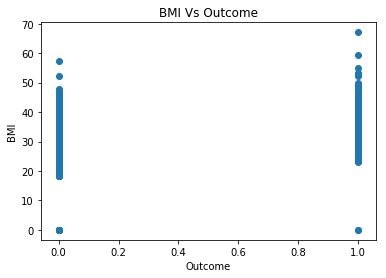

In [4]:
import matplotlib.pyplot as plt
plt.scatter(diabetes['Outcome'],diabetes['BMI'])
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.title("BMI Vs Outcome")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

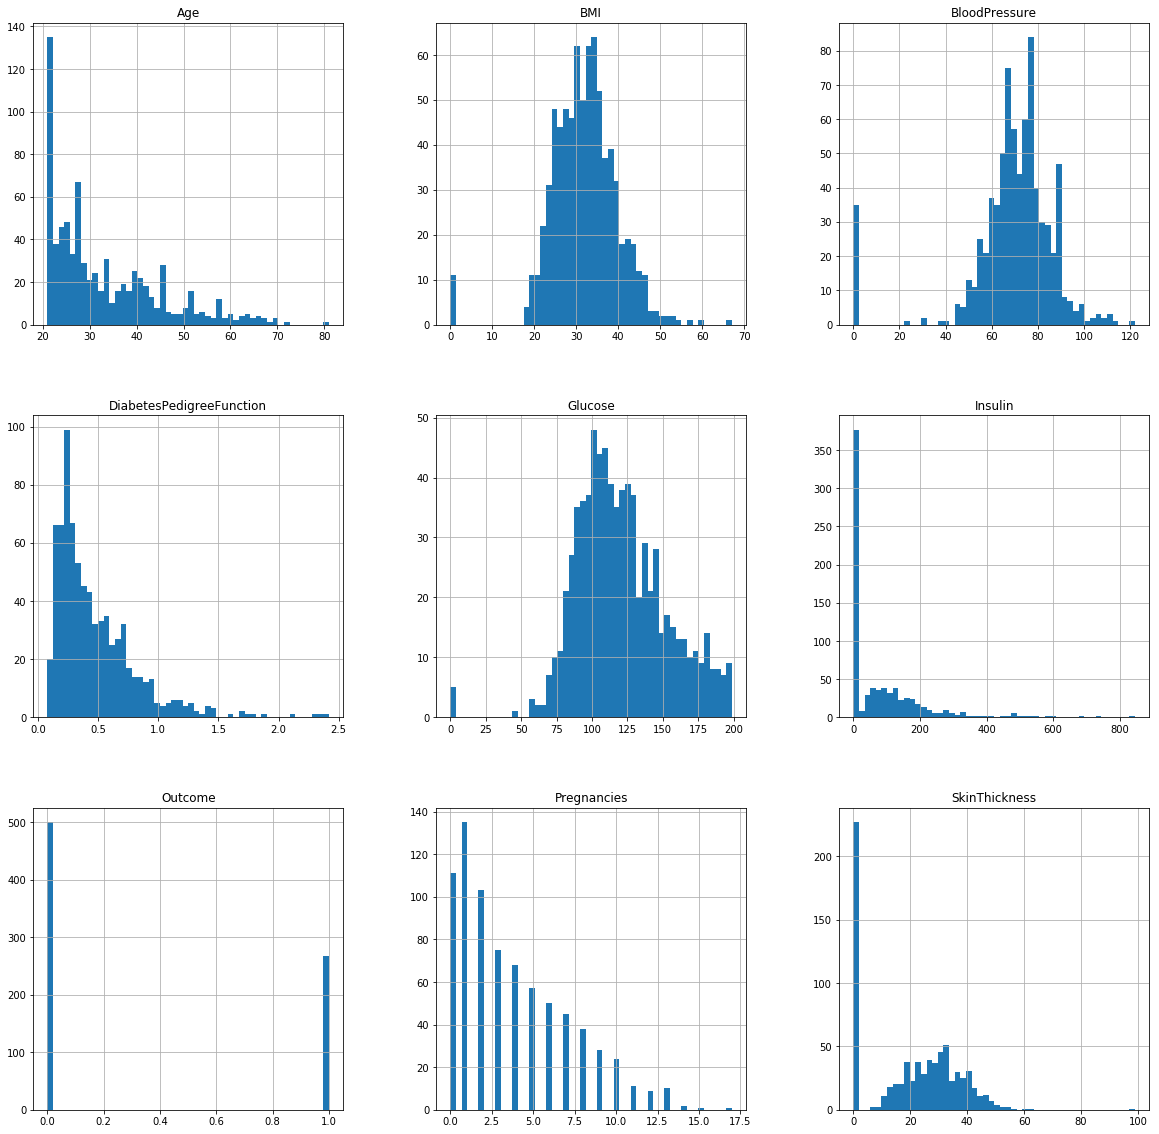

In [5]:
diabetes.hist(bins=50,figsize=(20,20))
plt.show

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.shape

(768, 9)

In [8]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
corre=diabetes.corr()
corre

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


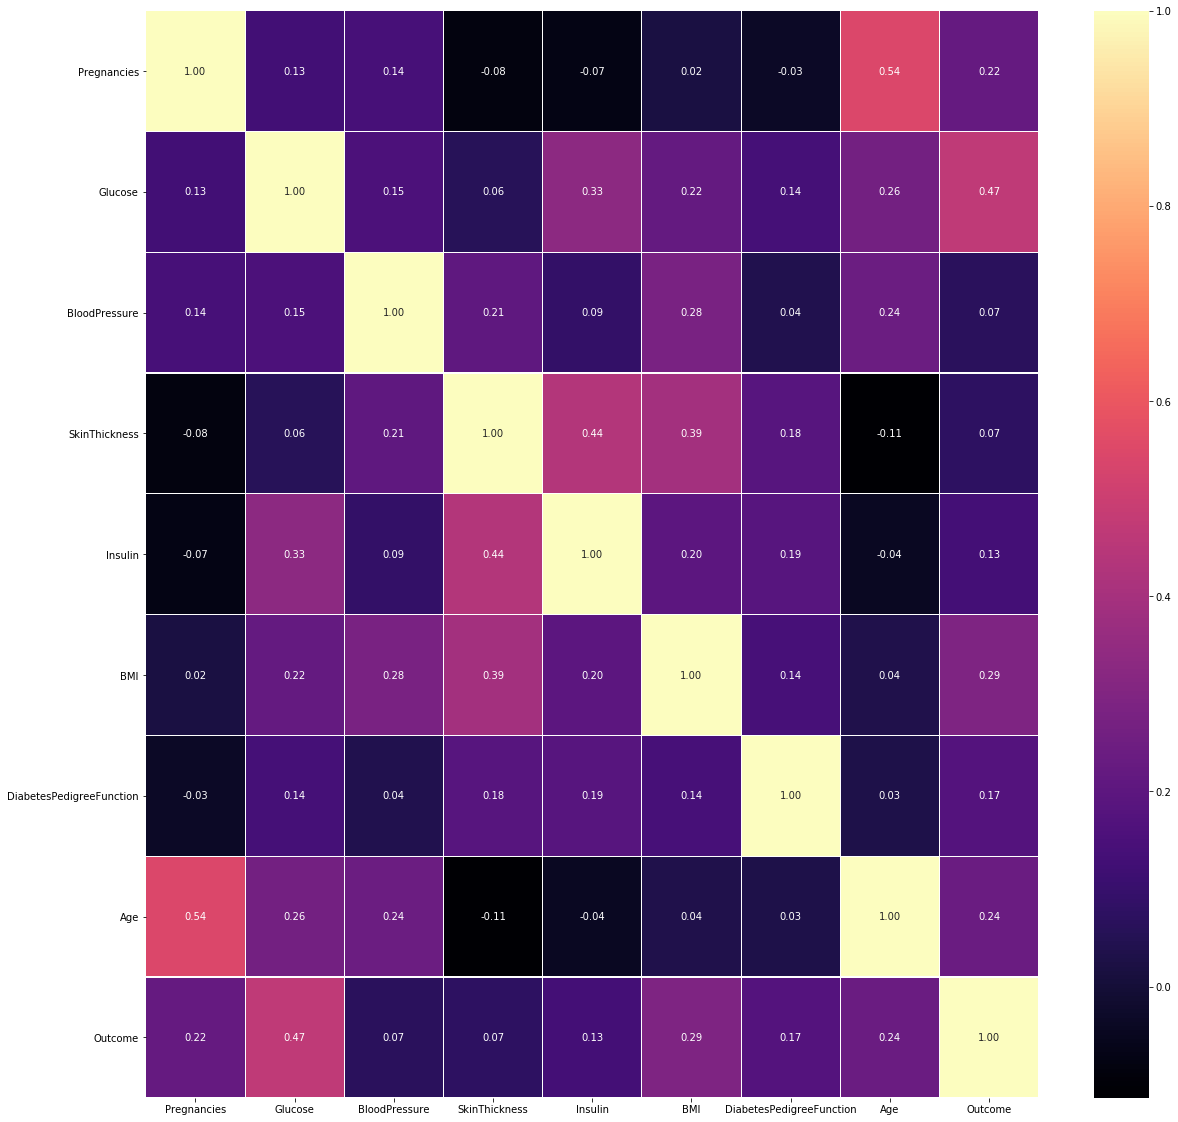

In [10]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(corre,annot=True,linewidths=.05,fmt='.2f',cmap="magma" )


In [11]:
traindata=diabetes.drop(['Outcome'],axis=1)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scale=MinMaxScaler()

In [14]:
traindata[traindata.columns]=scale.fit_transform(traindata[traindata.columns])
traindata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [15]:
testdata=diabetes['Outcome']


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(traindata,testdata,test_size=.20)


In [18]:
x_train.shape,x_test.shape

((614, 8), (154, 8))

In [19]:
y_train.shape,y_test.shape

((614,), (154,))

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log=LogisticRegression()

In [22]:
log.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
log.score(x_test,y_test)*100

76.62337662337663

In [24]:
#printing confusion_matrix( we need confusion matrix when data set is imbalance)
from sklearn.metrics import confusion_matrix
y_predict=log.predict(x_test)
results=confusion_matrix(y_test,y_predict)
print("confusion matrix:")
print(results)

confusion matrix:
[[89 11]
 [25 29]]


In [25]:
proba=log.predict_proba(x_test[0:5]) #this shows the probability of any result being No or Yes
print(proba)

[[0.43395062 0.56604938]
 [0.43045927 0.56954073]
 [0.70999337 0.29000663]
 [0.35244648 0.64755352]
 [0.45208798 0.54791202]]


In [26]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [27]:
fpr,tpr,threshold=roc_curve(y_test,log.predict_proba(x_test)[:,1])


In [28]:
fpr[0:5]

array([0.  , 0.  , 0.02, 0.02, 0.03])

In [29]:
tpr[0:5]

array([0.        , 0.01851852, 0.01851852, 0.40740741, 0.40740741])

In [30]:
threshold[0:5]

array([1.86284466, 0.86284466, 0.78684499, 0.62251053, 0.62098859])

In [31]:
roc_auc=roc_auc_score(y_test,log.predict(x_test))

In [32]:
roc_auc

0.7135185185185186

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


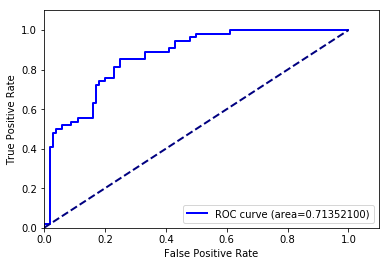

In [33]:
import matplotlib.pyplot as plt # matplotlib is used for plotting the curve
plt.figure()
lw=2
plt.plot(fpr,tpr,color='blue',lw=lw,label='ROC curve (area=%.5f100)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=lw,linestyle='--')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower_right")
plt.show()

In [34]:
y_predict=log.predict_proba(x_test)
y_predict[0:5]

array([[0.43395062, 0.56604938],
       [0.43045927, 0.56954073],
       [0.70999337, 0.29000663],
       [0.35244648, 0.64755352],
       [0.45208798, 0.54791202]])

In [35]:
from sklearn.preprocessing import binarize #important for converting the probability values in binary form

In [36]:
y_pred=binarize(y_predict,0.495)
y_pred[0:5]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [37]:
y_pred1=y_pred[:,1]
y_pred1 # the output is in float we need to convert this output into integer type

array([1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0.])

In [38]:
y_pred2=y_pred1.astype(int)
y_pred2 # now the output is in integer type

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [39]:
tuned_result=confusion_matrix(y_test,y_pred2)
print("confusion martics after tuning:")
print(tuned_result)

confusion martics after tuning:
[[89 11]
 [25 29]]


In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)


0.7662337662337663